<a href="https://colab.research.google.com/github/ASHMITA489/Python/blob/master/k_means_clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install kmeans

In [ ]:
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

In [ ]:
centroids=[(-5,-5), (5,5), (-2.5, 2.5)]
cluster_std=[1,1,1]

In [ ]:
x,y=make_blobs(n_samples=100, centers=centroids, cluster_std=cluster_std, n_features=2, random_state=2)

In [ ]:
import random
import numpy as np

In [ ]:
class KMeans:
  def __init__(self, n_clusters=2, max_iter=100):
    self.n_clusters=n_clusters
    self.max_iter=max_iter
    self.centroids=None

  def fit_predict(self, x):

    random_index=random.sample(range(0, x.shape[0]), self.n_clusters)
    self.centroids=x[random_index]

    for i in range(self.max_iter):
      #assign clusters
      cluster_group=self.assign_clusters(x)
      old_centroids=self.centroids
      #move centroids
      self.centroids=self.move_centroids(x, cluster_group)
      #check finish
      if (self.centroids==old_centroids).all():
        break
    return cluster_group


  def assign_clusters(self, x):
    cluster_group=[]
    distances=[]

    for row in x:
      for centroid in self.centroids:
        distances.append(np.sqrt(np.dot(row-centroid, row-centroid)))
      min_distances=min(distances)
      index_pos=distances.index(min_distances)
      distances.clear()
      cluster_group.append(index_pos)
    return np.array(cluster_group)

  def move_centroids(self, x, cluster_group):
    new_centroids=[]
    cluster_type=np.unique(cluster_group)

    for type in cluster_type:
      new_centroids.append(x[cluster_group==type].mean(axis=0))

    return np.array(new_centroids)

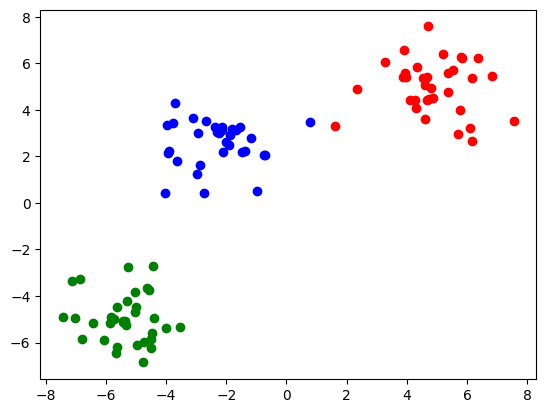

In [ ]:
km=KMeans(n_clusters=3, max_iter=100)
y_means=km.fit_predict(x)
plt.scatter(x[y_means==0,0], x[y_means==0,1], color='red')
plt.scatter(x[y_means==1,0], x[y_means==1,1], color='blue')
plt.scatter(x[y_means==2,0], x[y_means==2,1], color='green')
plt.show()

In [ ]:
import numpy as np
a=np.array([1,2])
b=np.array([4,5])
np.sqrt(np.dot(b-a, b-a))

4.242640687119285

In [ ]:
x=np.array([[1,2], [2,3], [3,4], [4,5], [5,6]])

In [ ]:
x

array([[1, 2],
       [2, 3],
       [3, 4],
       [4, 5],
       [5, 6]])

In [ ]:
cluster_group=np.array([0,1,1,0,0])

In [ ]:
np.unique(cluster_group)

array([0, 1])

In [ ]:
for type in np.unique(cluster_group):
  print(x[cluster_group==type].mean(axis=0))

[3.33333333 4.33333333]
[2.5 3.5]


In [ ]:
x[cluster_group==0].mean(axis=0)

array([3.33333333, 4.33333333])